In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast



In [ ]:

# print('xtxtxt')
# def load_raw_data(df, sampling_rate, path):
#     if sampling_rate == 100:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
#     else:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
#     data = np.array([signal for signal, meta in data])
#     return data

# path = '../ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
# sampling_rate=100

# # load and convert annotation data
# Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
# Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# # Load raw signal data
# X = load_raw_data(Y, sampling_rate, path)
# print('xrxrxr')
# # Load scp_statements.csv for diagnostic aggregation
# agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
# agg_df = agg_df[agg_df.diagnostic == 1]

# def aggregate_diagnostic(y_dic):
#     tmp = []
#     for key in y_dic.keys():
#         if key in agg_df.index:
#             tmp.append(agg_df.loc[key].diagnostic_class)
#     return list(set(tmp))

# # Apply diagnostic superclass
# Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# # Split data into train and test
# test_fold = 10
# # Train
# X_train = X[np.where(Y.strat_fold != test_fold)]
# y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# # Test
# X_test = X[np.where(Y.strat_fold == test_fold)]
# y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass



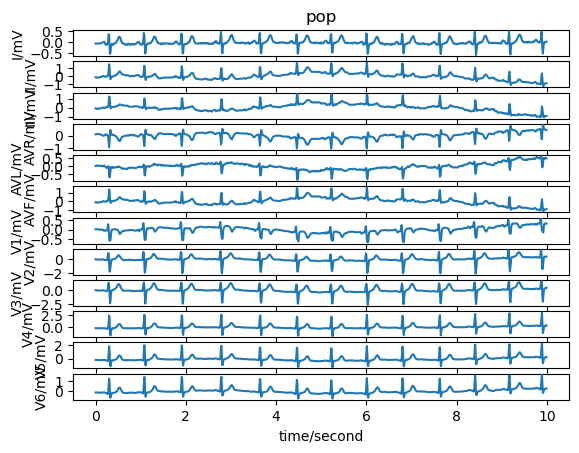

In [2]:
record = wfdb.rdrecord('records100\\00000\\00004_lr')

wfdb.plot_wfdb(record=record, title="pop")
